In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# File path
os.chdir("../..")
home_dir = os.getcwd()
sa_data_folder =  home_dir +'/data/PlasMAG/'
sa_file_name = 'sa_2016_2023_raw.csv'
#sa_file_name = 'dsc_fc_summed_spectra_2016_v01.csv'
ou_file_name = 'satellite_data.csv'
sa_file_path = sa_data_folder + sa_file_name
ou_file_path = sa_data_folder + ou_file_name


In [3]:
sa = pd.read_csv(sa_file_path, delimiter = ',', parse_dates=[0],  header = None, na_values=['0'])
# set headers
columns = ["date", "MF_nT_GSE_x",  "MF_nT_GSE_y", "MF_nT_GSE_z"]
for i in range(4, 54):
	columns.append(f"C_{i:02d}")
sa.columns = columns

In [4]:
def sa_count_rows_per_day(sa, theyear):
    year_rows = sa[sa['date'].dt.year == theyear]['date']
    day_of_year = year_rows.dt.dayofyear
    row_count_per_day = day_of_year.groupby(day_of_year).value_counts()
    return day_of_year.unique(),row_count_per_day.values


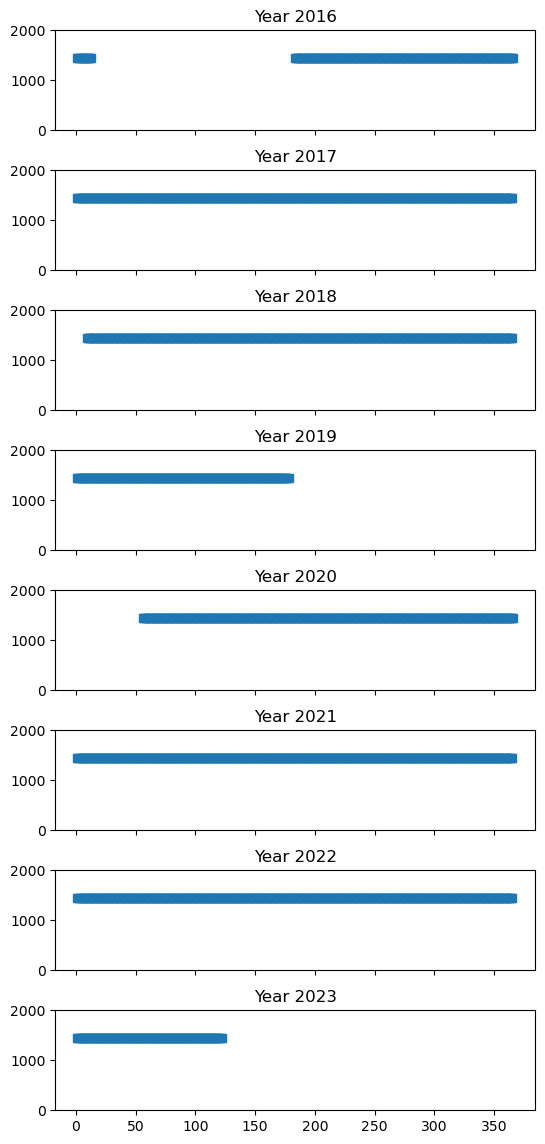

In [16]:
years =[2016,2017,2018,2019,2020,2021,2022,2023]
fig, axis = plt.subplots(len(years), sharex=True, sharey=True, figsize = (6, 6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.4)

for index, year in enumerate(years):
    x, y = sa_count_rows_per_day(sa, year)
    axis[index].scatter(x, y , marker = ",")
    axis[index].set_title("Year " + str(year))
    axis[index].set_ylim(0, 2000)
 
